In [ ]:
# Task 1(i)
# Quick Sort

def quickSort(arr, low = 0, high = len(arr)-1):
  if (low < high):
    pi = partition(arr, low, high)
    quickSort(arr, low, pi-1)
    quickSort(arr, pi+1, high)


def partition(arr, low, high):
  pivot = arr[high]
  i = low - 1
  for j in range(low, high):
    if (arr[j] <= pivot):
      i += 1
      arr[i] , arr[j] = arr[j], arr[i]
  arr[i+1], arr[high] = arr[high], arr[i+1]
  return i+1


# Driver Code

input_file = open("/content/sample_data/input1_part1.txt", mode = "r")
input_data = input_file.readlines()

arr = [int(i) for i in input_data[1].split(" ")]
size = int(input_data[0].strip())

quickSort(arr)


output_file = open('/content/sample_data/output1_part1.txt', mode = 'w')
for i in range(len(arr)):
  output_file.write(f"{arr[i]} ")

output_file.close()


In [ ]:
# Task 1(ii)
# Driver Code

input_file = open("/content/sample_data/input1_part2.txt", mode = "r")
input_data = input_file.readlines()

arr = [int(i) for i in input_data[1].split(" ")]
size = int(input_data[0].strip())
k1 = int(input_data[2].strip())
k2 = int(input_data[3].strip())
k3 = int(input_data[4].strip())


def findK(arr, k, low = 0, high = len(arr)-1):
  if (low <= high):
    pi = partition(arr, low, high)
    if (pi == k-1):
      return arr[pi]
    elif (pi < k-1):
      return findK(arr, k, pi+1, high)
    else:
      return findK(arr, k, low, pi-1)

def partition(arr, low, high):
  pivot = arr[high]
  i = low - 1
  for j in range(low, high):
    if (arr[j] <= pivot):
      i += 1
      arr[i] , arr[j] = arr[j], arr[i]
  arr[i+1], arr[high] = arr[high], arr[i+1]
  return i+1




val_k1 = findK(arr, k1)
val_k2 = findK(arr, k2)
val_k3 = findK(arr, k3)

output_file = open('/content/sample_data/output1_part2.txt', mode = 'w')
output_file.write(f"{val_k1}\n")
output_file.write(f"{val_k2}\n")
output_file.write(f"{val_k3}\n")
output_file.close()


In [ ]:
# Task 2

class Heap:
  def __init__(self, arr):
    self.capacity = 25
    self.heap = ["HEAP"]*(self.capacity)
    self.size = 0
    self.build(arr)


  def build(self, arr):
    for i in range(len(arr)):
      self.add(arr[i])

  def add(self, key):
    if (self.size == self.capacity):  # resizing
      self.temp = ["HEAP"] * (self.capacity*2)
      for i in range(self.size+1):
        self.temp[i] = self.heap[i]
      self.heap = self.temp
      self.capacity = (self.capacity)*2

    self.heap[self.size+1] = key
    self.size += 1
    self.heapify(self.size)


  def heapify(self, i):
    if (i <= 1):
      return
    elif (self.heap[i//2] >= self.heap[i]):
      self.heap[i//2], self.heap[i] = self.heap[i], self.heap[i//2]
      self.heapify(i//2)


  def delete(self):
    if (self.size == 0):
      return
    else:
      self.heap[1], self.heap[self.size] = self.heap[self.size], self.heap[1]
      self.size -= 1
      self.sink(1)


  def sink(self, i):
    if (self.size == 0):
      return
    else:
      left = 2*i
      right = (2*i) + 1
      if (left <= self.size and right <= self.size):
        if (self.heap[i] < self.heap[left] and self.heap[i] < self.heap[right]):
          pass
        elif self.heap[left] < self.heap[right]:
          self.heap[i] , self.heap[left] = self.heap[left], self.heap[i]
          self.sink(left)
        else:
          self.heap[i], self.heap[right] = self.heap[right], self.heap[i]
          self.sink(right)
      else:
        if (left <= self.size and right > self.size):
          self.heap[i], self.heap[left] = self.heap[left], self.heap[i]


  def heapSort(self):
    temp = self.size
    for i in range(self.size):
      self.delete()
    self.size = temp
  
  def print(self):
    for i in range(1, self.size):
      print(self.heap[i], end = ", ")
    print(self.heap[self.size])


input_file = open("/content/sample_data/input2.txt", mode = "r")
input_data = input_file.readlines()

arr = [int(i) for i in input_data[1].split(" ")]
size = int(input_data[0].strip())


h1 = Heap(arr)


while True:
  command = input("Enter Command: ")
  if (command == "A"):
    val = int(input("Enter the value you would like add: "))
    h1.add(val)
  elif (command == "B"):
    h1.delete()
  elif (command == "S"):
    h1.heapSort()
  elif (command == "P"):
    h1.print()
  else:
    break



# ---------
# Enter Command: P
# 0, 1, 6, 5, 2, 6, 8, 9, 15
# Enter Command: A
# Enter the value you would like add: 4
# Enter Command: P
# 0, 1, 6, 5, 2, 6, 8, 9, 15, 4
# Enter Command: A
# Enter the value you would like add: -20
# Enter Command: P
# -20, 0, 6, 5, 1, 6, 8, 9, 15, 4, 2
# Enter Command: S
# Enter Command: P
# 15, 9, 8, 6, 6, 5, 4, 2, 1, 0, -20
# Enter Command: EXIT


Enter Command: P
0, 1, 6, 5, 2, 6, 8, 9, 15
Enter Command: A
Enter the value you would like add: 4
Enter Command: P
0, 1, 6, 5, 2, 6, 8, 9, 15, 4
Enter Command: A
Enter the value you would like add: -20
Enter Command: P
-20, 0, 6, 5, 1, 6, 8, 9, 15, 4, 2
Enter Command: S
Enter Command: P
15, 9, 8, 6, 6, 5, 4, 2, 1, 0, -20
Enter Command: EXIT


In [ ]:
# Task 2 (alternate) # Done during the lab

def build(arr):
  heap = [None] * (len(arr) + 1)
  heap[0] = "HEAP"
  size = 0
  for i in range(len(arr)):
    add(heap, arr[i], size)
    size += 1
  return heap

def add(heap, key, size):
  heap[size+1] = key
  heapify(heap, size+1)


def heapify(heap, i):
  if (i <= 1):
    return
  elif (heap[i//2] >= heap[i]):
    heap[i//2], heap[i] = heap[i], heap[i//2]
    heapify(heap, i//2)


def delete(heap, size):
  if (size == 0):
    return
  else:
    heap[1], heap[size] = heap[size], heap[1]
    sink(heap, 1, size-1)


def sink(heap, i, size):
  if size == 0:
    return
  else:
    left = 2*i
    right = (2*i) + 1
    if (left <= size and right <= size):
      if (heap[i] < heap[left] and heap[i] < heap[right]):
        pass
      elif heap[left] < heap[right]:
        heap[i] , heap[left] = heap[left], heap[i]
        sink(heap, left, size)
      else:
        heap[i], heap[right] = heap[right], heap[i]
        sink(heap, right, size)
    else:
      if (left <= size and right > size):
        heap[i], heap[left] = heap[left], heap[i]


def heapSort(heap):
  for i in range(len(heap)-1):
    delete(heap, len(heap)-1-i)


h1 = build([5, 1, 6, 2, 0, 6, 8, 9, 15])
print(h1)

heapSort(h1)
print(h1)


In [28]:
# Task 3 (a)

# Using Bubble Sort

input_file = open("/content/sample_data/input3.txt", mode = "r")
input_data = input_file.readlines()

inputs = [i.strip() for i in input_data]


class PatientsQueue_b:
  def __init__(self):
    self.queue = [None]*15
    self.capacity = 15
    self.size = 0
  
  def enqueue(self, patient):
    if self.size == self.capacity:
      self.capacity *= 2
      self.temp = [None]*self.capacity
      for i in range(len(self.queue)):
        self.temp[i] = self.queue[i]
      self.queue = self.temp
  
    self.queue[self.size] = patient
    self.size += 1
    i = self.size-1
    while (i>=1) and int((self.queue[i-1])[-1]) > int(self.queue[i][-1]):
        self.queue[i-1], self.queue[i] = self.queue[i], self.queue[i-1]
        i = i-1
  
  def seeDoctor(self):
    current = self.queue[0]
    for i in range(1, self.size):
      self.queue[i-1] = self.queue[i]
    self.size -= 1
    print(f"{current[:-2]} is being seen")

  def printQueue(self):
    for i in range(self.size):
      print(self.queue[i])



patientsQueue_1 = PatientsQueue_b()

for i in range(len(inputs)):
  if inputs[i] == "see doctor":
    patientsQueue_1.seeDoctor()
  else:
    patientsQueue_1.enqueue(inputs[i])


print(f"\nPatients currently in the queue: ")
patientsQueue_1.printQueue()




KLM is being seen
SDF is being seen
FDS is being seen
XCV is being seen
ABC is being seen

Patients currently in the queue: 
EWQ 3
OPN 3
TYU 3


In [29]:
# Task 3 (b)

# Using Heap

input_file = open("/content/sample_data/input3.txt", mode = "r")
input_data = input_file.readlines()

inputs = [i.strip() for i in input_data]


class PatientsQueue_h:
  def __init__(self):
    self.capacity = 25
    self.heap = ["HEAP"]*(self.capacity)
    self.size = 0

  def enqueue(self, key):
    if (self.size == self.capacity):  # resizing
      self.temp = ["HEAP"] * (self.capacity*2)
      for i in range(self.size+1):
        self.temp[i] = self.heap[i]
      self.heap = self.temp
      self.capacity = (self.capacity)*2

    self.heap[self.size+1] = key
    self.size += 1
    self.heapify(self.size)


  def heapify(self, i):
    if (i <= 1):
      return
    elif (int(self.heap[i//2][-1]) > int(self.heap[i][-1])):
      self.heap[i//2], self.heap[i] = self.heap[i], self.heap[i//2]
      self.heapify(i//2)


  def seeDoctor(self):
    if (self.size == 0):
      return
    else:
      self.heap[1], self.heap[self.size] = self.heap[self.size], self.heap[1]
      self.size -= 1
      self.sink(1)
      print(f"{self.heap[self.size+1][:-2]} is being seen.")


  def sink(self, i):
    if (self.size == 0):
      return
    else:
      left = 2*i
      right = (2*i) + 1
      if (left <= self.size and right <= self.size):
        if (int(self.heap[i][-1]) < int(self.heap[left][-1]) and int(self.heap[i][-1]) < int(self.heap[right][-1])):
          pass
        elif int(self.heap[left][-1]) <= int(self.heap[right][-1]):
          self.heap[i] , self.heap[left] = self.heap[left], self.heap[i]
          self.sink(left)
        else:
          self.heap[i], self.heap[right] = self.heap[right], self.heap[i]
          self.sink(right)
      else:
        if (left <= self.size and right > self.size):
          self.heap[i], self.heap[left] = self.heap[left], self.heap[i]

  def printQueue(self):
    for i in range(1, self.size+1):
      print(self.heap[i])



patientsQueue_2 = PatientsQueue_h()

for i in range(len(inputs)):
  if inputs[i] == "see doctor":
    patientsQueue_2.seeDoctor()
  else:
    patientsQueue_2.enqueue(inputs[i])


print(f"\nPatients currently in the queue: ")
patientsQueue_2.printQueue()


KLM is being seen.
SDF is being seen.
FDS is being seen.
XCV is being seen.
ABC is being seen.

Patients currently in the queue: 
TYU 3
OPN 3
EWQ 3


In [ ]:
# Task 3(C)
# There is no difference in seeDoctor() function call outputs for both the implementations.
# Patients are being seen in the right order for both the cases.

# But, point to be noted, in case of a bigger tree - the Heap Implementation may give unwanted answer
# For example, let us assume a Heap:

#                                        A3
#                  B3                                            C3
#           D3           E4                              F3             G3
#       (H3  I3)      (J3  K3)                        (M3  N3)     (O3   None)



# Now if we add a new node "L2", it will first be placed at "None" Position
# Then it will swim up till it reaches the Root
# The heap will become like this:

#                                        L2
#                  B3                                            A3
#           D3           E4                              F3             C3
#       (H3  I3)      (J3  K3)                        (M3  N3)       (O3   G3)


# Now, if we call "seeDoctor", L2 will be released, and the heap will become:

#                                        G3
#                  B3                                            A3
#           D3           E4                              F3             C3
#       (H3  I3)      (J3  K3)                        (M3  N3)       (O3   )

# As we can see here, G3 can not sink down anymore, because it does not have any comparison factor anymore
# But this position, where G3 currently is, is also not its right position. Because A3, B3, C3 and so on.. were in the queue even before G3, 
# so they should have been in the upper levels than G3

# This problem arises because it is a tree structure. During a traversal, it can only choose and traverse half the tree.
# The right way to sink down for this problem is to go by comparing each nodes level-wise (Like BFS)
# But, that would invalidate the way Heap Structure is
# So, I think, Using Queue is the most proper way for solving this problem.


KLM is being seen
SDF is being seen
FDS is being seen
XCV is being seen
ABC is being seen
KLM is being seen.
SDF is being seen.
FDS is being seen.
XCV is being seen.
ABC is being seen.


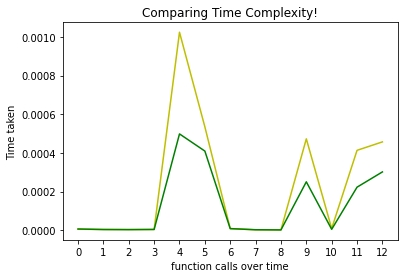

In [78]:
# Task 3(d)

import time
import math
import matplotlib.pyplot as plt
import numpy as np


input_file = open("/content/sample_data/input3.txt", mode = "r")
input_data = input_file.readlines()
inputs = [i.strip() for i in input_data]


x = []
y = []
z = []

patientsQueue_1 = PatientsQueue_b()
for i in range(len(inputs)):
  x.append(i)
  start = time.time()
  if inputs[i] == "see doctor":
    patientsQueue_1.seeDoctor()
  else:
    patientsQueue_1.enqueue(inputs[i])
  end = time.time()
  y.append(end-start)
  



patientsQueue_2 = PatientsQueue_h()
for i in range(len(inputs)):
  start = time.time()
  if inputs[i] == "see doctor":
    patientsQueue_2.seeDoctor()
  else:
    patientsQueue_2.enqueue(inputs[i])
  end = time.time()
  z.append(end-start)
  



x_interval = math.ceil(n/10)
plt.plot(x, y, 'y')  # Bubble  --> Yellow
plt.plot(x, z, 'g')  # Heap --> Green
plt.xticks(np.arange(min(x), max(x)+1, x_interval))
plt.xlabel('function calls over time')
plt.ylabel('Time taken')
plt.title('Comparing Time Complexity!')
plt.show()


In [ ]:
# Task 3(d):

#Comment from the Time Complexity Graph:
# For the Bubble Sort Implementation: at worst case, time complexity for adding a patient in queue is O(n)
# Similary, Seeing a patient (popping) also takes O(n) complexity at its worst case. Since, the entire list of elements are being left shifted everytime we pop.
# On the other hand, Both enqueue and pop functions in the Heap implementation takes O(logn) time. This is a much much better complexity - which can be visualized in the graph as well

# So all in all, Heap Implementation is faster than the Queue implementation in this problem, in terms of Time Complexity